In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [112]:
def load_image(image_path):
    if not os.path.isfile(image_path):
        print(f'Image file not found: {image_path}')
        return None
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original Image')
    plt.show()
    return image


In [113]:
def edge_detection(image, method='canny', sigma=0.33):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if method == 'canny':
        v = np.median(gray)
        lower = int(max(0, (1.0 - sigma) * v))
        upper = int(min(255, (1.0 + sigma) * v))
        edges = cv2.Canny(gray, lower, upper)
    elif method == 'marr-hildreth':
        edges = cv2.Laplacian(gray, cv2.CV_64F)
        edges = cv2.convertScaleAbs(edges)
        _, edges = cv2.threshold(edges, 30, 255, cv2.THRESH_BINARY)
    else:
        print('Invalid edge detection method')
        return None
    return edges


In [114]:
# def count_coins(edge_image, min_area=150):
#     kernel = np.ones((5,5), np.uint8)
#     edges_closed = cv2.morphologyEx(edge_image, cv2.MORPH_CLOSE, kernel)
#     contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
#     return len(filtered_contours), filtered_contours

def count_coins(edge_image, min_area=100):
    # Apply morphological closing to merge small gaps
    kernel = np.ones((3, 3), np.uint8)
    edges_closed = cv2.morphologyEx(edge_image, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(edges_closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter by area only
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    return len(filtered_contours), filtered_contours


In [115]:
def draw_contours(image, contours):
    output = image.copy()
    cv2.drawContours(output, contours, -1, (255, 0, 0), 2)
    plt.imshow(output)
    plt.axis('off')
    plt.title(f'Detected Coins: {len(contours)}')
    plt.show()


In [116]:
def crop_coins(image, contours, padding=10):
    coin_images = []
    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        x, y, w, h = max(x-padding, 0), max(y-padding, 0), w+2*padding, h+2*padding
        coin_crop = image[y:y+h, x:x+w]
        coin_images.append(coin_crop)
        plt.figure()
        plt.imshow(coin_crop)
        plt.axis('off')
        plt.title(f'Coin {i+1}')
    return coin_images


In [117]:
def detect_coins(image_path):
    image = load_image(image_path)
    if image is not None:
        edges = edge_detection(image, 'canny')
        num_coins, contours = count_coins(edges)
        print(f'Total coins detected: {num_coins}')
        draw_contours(image, contours)
        cropped_coins = crop_coins(image, contours)
        return
    else:
        print('Error loading image')

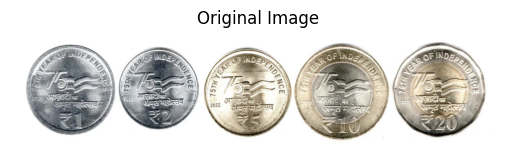

Total coins detected: 5


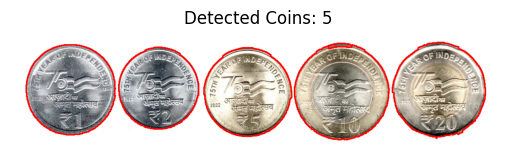

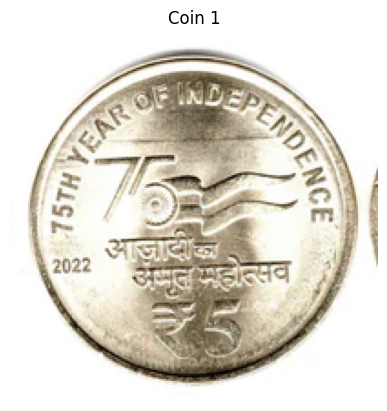

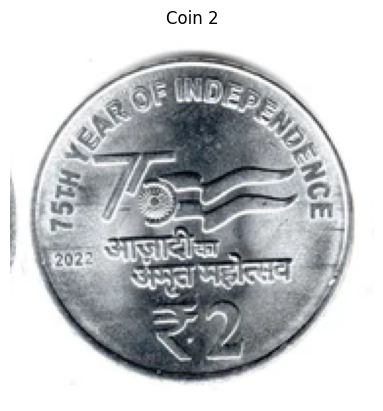

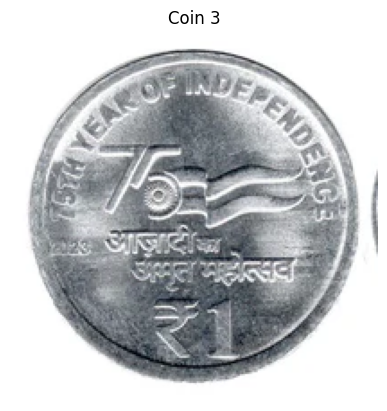

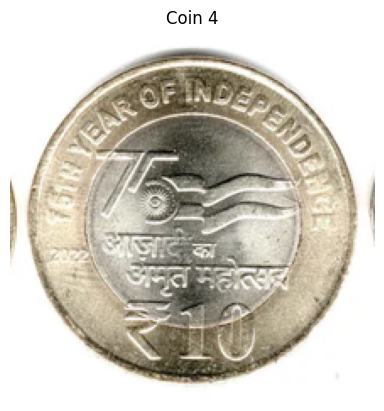

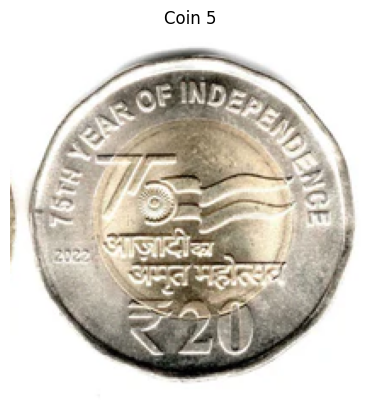

In [118]:
# calling detect coins:

detect_coins('images/coins1.webp')

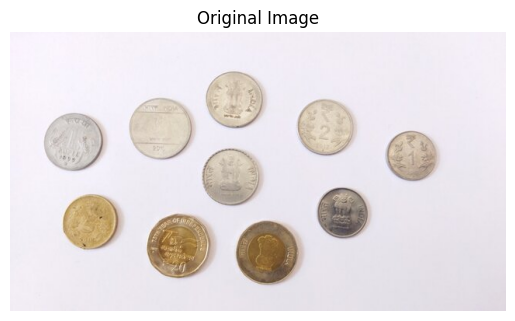

Total coins detected: 11


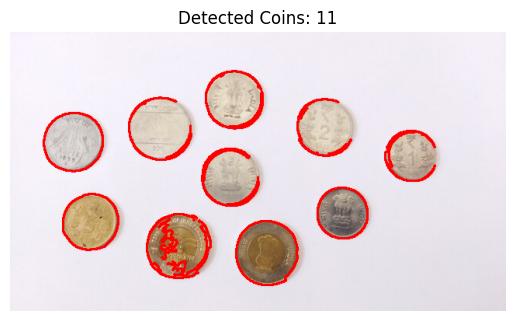

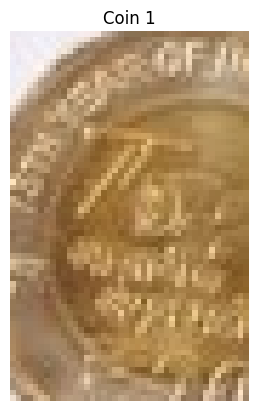

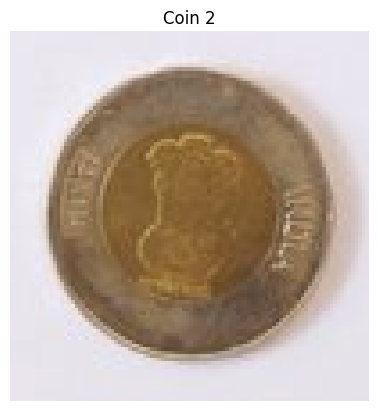

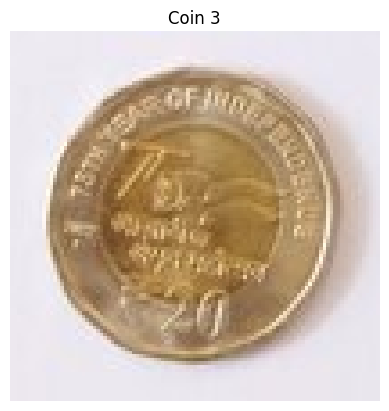

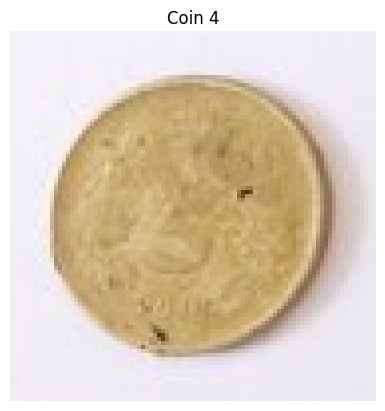

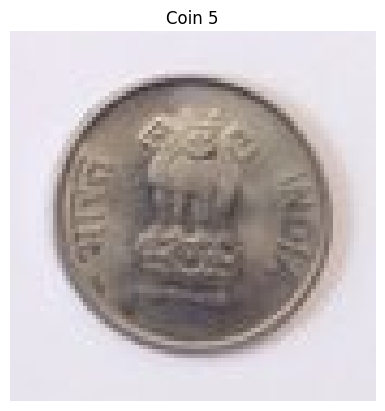

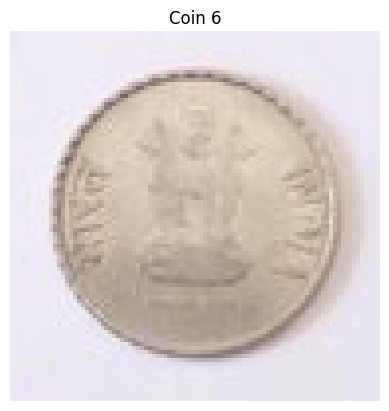

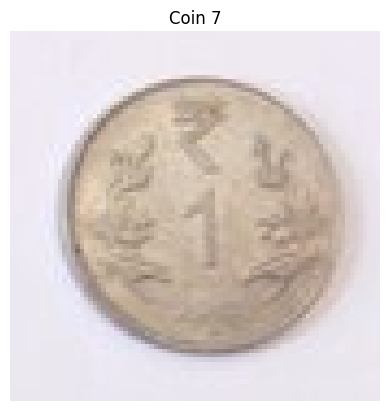

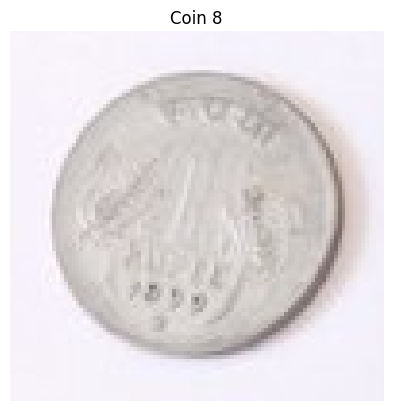

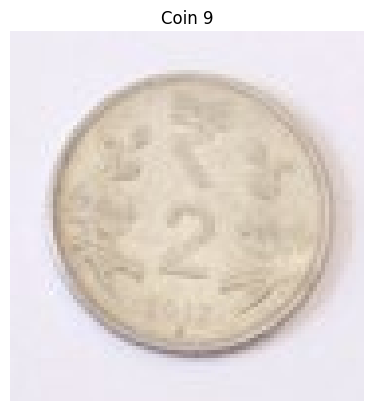

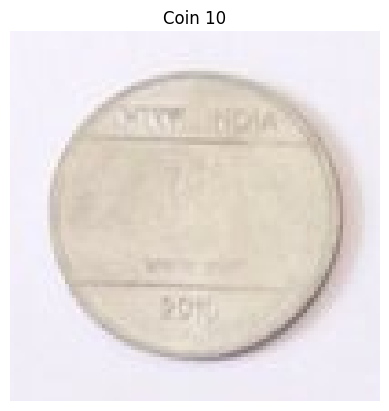

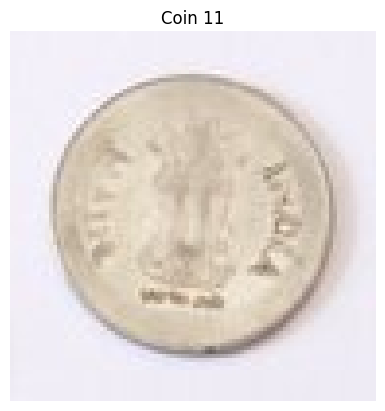

In [119]:
detect_coins('images/coins2.jpg')

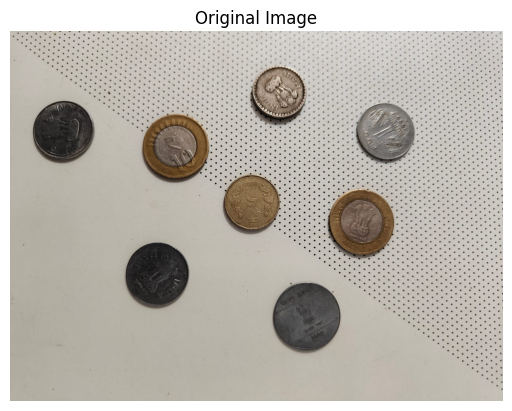

Total coins detected: 8


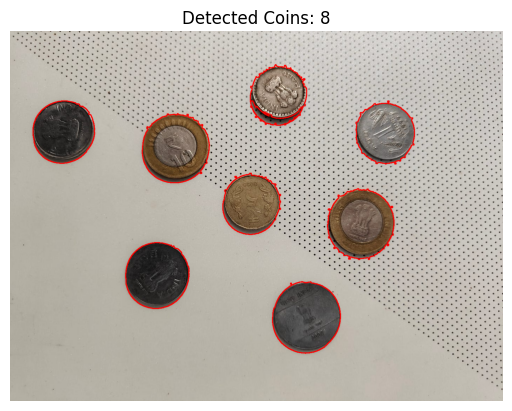

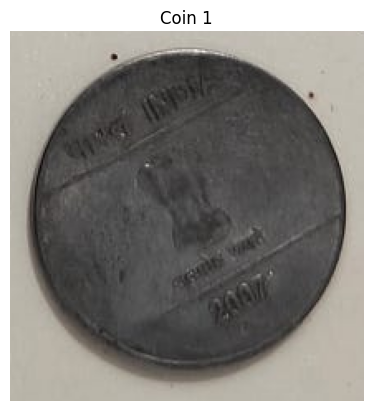

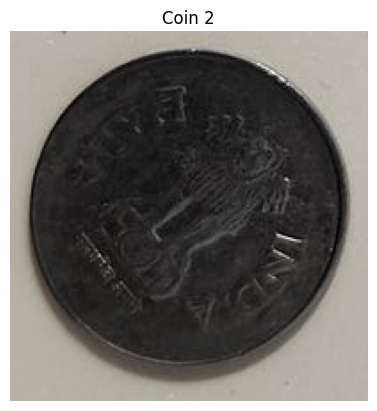

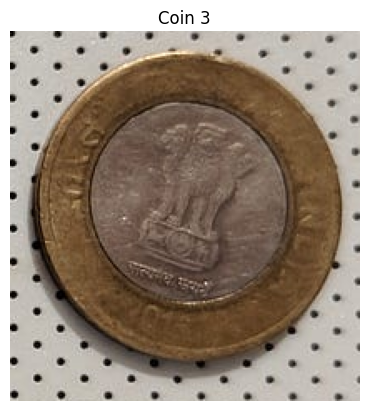

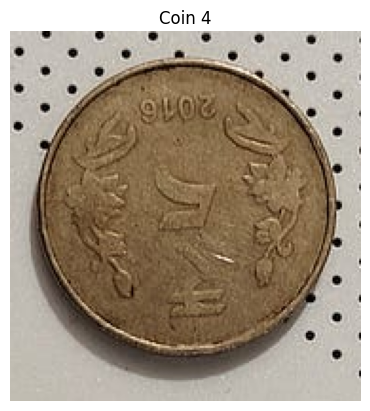

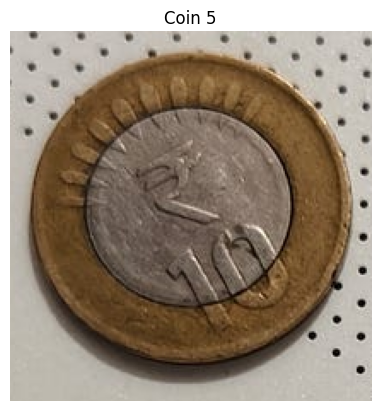

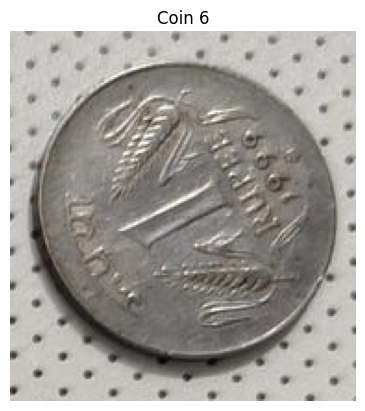

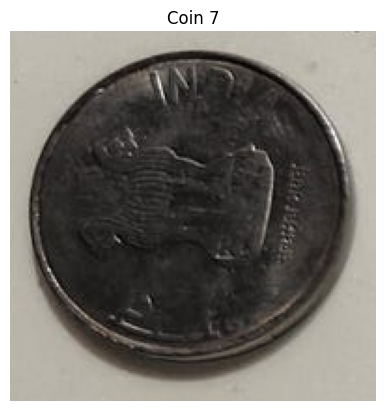

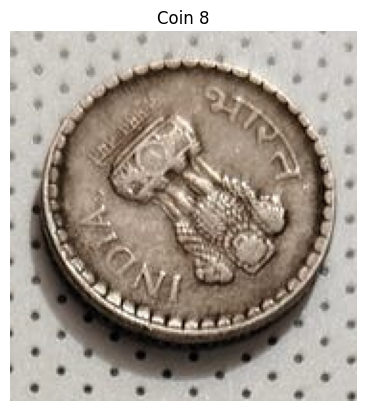

In [120]:
detect_coins('images/coins3.jpg')